In [4]:
import pickle
import numpy as np
#
# Load np arrays (stored in a pickle file) from disk
#
pipeline_id = "A652_E-N_EI"
file = open("../data/datasets/" + pipeline_id + ".pickle", 'rb')
(X_train, y_train,  
 X_val, y_val,  
 X_test, y_test) = pickle.load(file)

In [ ]:
import numpy as np

def replace_with_5(arr):
    result = np.zeros_like(arr)  # create a new array with zeros of same size as arr
    result[arr < 5] = 5
    result[arr arr < 5] = 5
    return result

In [33]:
import numpy as np

def compute_weights(input_array):
    output_array = np.zeros_like(input_array)

    mask_weak = np.logical_and(input_array >= 0, input_array < 5)
    output_array[mask_weak] = 1
    
    mask_moderate = np.logical_and(input_array >= 5, input_array < 25)
    output_array[mask_moderate] = 5
    
    mask_strong = np.logical_and(input_array >= 25, input_array < 50)
    output_array[mask_strong] = 25
    
    mask_extreme = np.logical_and(input_array >= 50, input_array < 150)
    output_array[mask_extreme] = 50
    
    return output_array

In [34]:
weight = computer_weights(y_train)

In [31]:
len(weight)

10229

In [27]:
weight[:3]

array([[1.],
       [1.],
       [1.]])

In [35]:
min(weight), max(weight)

(array([1.]), array([50.]))

In [36]:
np.unique(weight)

array([ 1.,  5., 25., 50.])

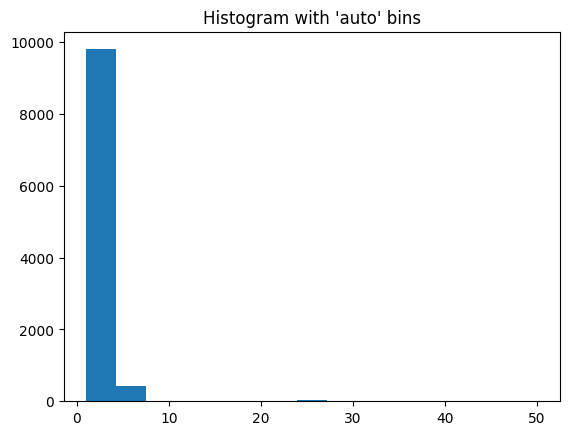

In [37]:
import matplotlib.pyplot as plt
_ = plt.hist(weight, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [41]:
for i in [1,5,25,50]:
    print(np.count_nonzero(weight==i))

9793
412
22
2


In [76]:
import torch
import torch.nn as nn

In [136]:
input = torch.FloatTensor([[.9, .9, .1, .1], 
                           [.9, .9, .1, .1], 
                           [.9, .9, .1, .1], 
                           [.9, .9, .1, .1]])
target = torch.FloatTensor([[.9, .9, .9, .1], 
                            [.9, .9, .9, .1],
                            [.9, .9, .9, .1],
                            [.9, .9, .9, .1]])

def non_weighted_mse_loss(input, target, weight):
    if is_debug_on:
        print("*debug*")
        print(f"(input - target):\n{(input - target)}")
        print(f"(input - target) ** 2:\n{(input - target) ** 2}")
        print(f"((input - target) ** 2).mean():\n{((input - target) ** 2).mean()}")
        print(input.shape[0])
        print(f"((input - target) ** 2).sum():\n{((input - target) ** 2).sum()}")
        print(f"((input - target) ** 2).sum()/input.shape[0]:\n{((input - target) ** 2).sum()/(input.shape[0]*input.shape[1])}")
        print("*debug*")
    return ((input - target) ** 2).mean()

loss = nn.MSELoss()
print(f"output (PyTorch.MSE): {loss(input, target)}")

loss = non_weighted_mse_loss
print(f"output (non-weighted MSE): {loss(input, target, weight_tensor)}")

output (PyTorch.MSE): 0.15999998152256012
*debug*
(input - target):
tensor([[ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000]])
(input - target) ** 2:
tensor([[0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000]])
((input - target) ** 2).mean():
0.15999998152256012
4
((input - target) ** 2).sum():
2.559999704360962
((input - target) ** 2).sum()/input.shape[0]:
0.15999998152256012
*debug*
output (non-weighted MSE): 0.15999998152256012


In [144]:
is_debug_on = True
def weighted_mse_loss(input, target, weight):
    nom = (weight * (input - target) ** 2).sum()
    denom = ((weight * input.shape[1])).sum()
    if is_debug_on:
        print("*debug*")
        print(f"(input - target):\n{(input - target)}")
        print(f"(input - target) ** 2:\n{(input - target) ** 2}")
        print(f"((input - target) ** 2).sum():\n{((input - target) ** 2).sum()}")
        print(f"(weight * (input - target) ** 2):\n{(weight * (input - target) ** 2)}")
        print(f"(weight * (input - target) ** 2).sum():\n{(weight * (input - target) ** 2).sum()}")
        print(f"weight.sum():\n{weight.sum()}")
        print(f"nom = {nom}")
        print(f"denom = {denom}")
        print("*debug*")
    return nom #/ denom
    
# input = torch.FloatTensor([[.9, .9, .1, .1], 
#                            [.9, .9, .9, .1]])
# target = torch.FloatTensor([[.9, .9, .1, .1], 
#                             [.9, .9, .1, .1]])

def test_weighted_loss(input, target, weight_tensor):
    loss = weighted_mse_loss
    print(f"input: {input}\ntarget: {target}\nweight: {weight_tensor}")
    print(f"output (weighted MSE): {loss(input, target, weight_tensor)}")

print("***EQUAL WEIGHTS***")
weight_tensor = torch.FloatTensor([[1.], [1.], [1.], [1.]])
test_weighted_loss(input, target, weight_tensor)

print("***DIFFERENT WEIGHTS***")
weight_tensor = torch.FloatTensor([[1.], [5.], [25.], [1.]])
test_weighted_loss(input, target, weight_tensor)

***EQUAL WEIGHTS***
input: tensor([[0.9000, 0.9000, 0.1000, 0.1000],
        [0.9000, 0.9000, 0.1000, 0.1000],
        [0.9000, 0.9000, 0.1000, 0.1000],
        [0.9000, 0.9000, 0.1000, 0.1000]])
target: tensor([[0.9000, 0.9000, 0.9000, 0.1000],
        [0.9000, 0.9000, 0.9000, 0.1000],
        [0.9000, 0.9000, 0.9000, 0.1000],
        [0.9000, 0.9000, 0.9000, 0.1000]])
weight: tensor([[1.],
        [1.],
        [1.],
        [1.]])
*debug*
(input - target):
tensor([[ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000],
        [ 0.0000,  0.0000, -0.8000,  0.0000]])
(input - target) ** 2:
tensor([[0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0.0000]])
((input - target) ** 2).sum():
2.559999704360962
(weight * (input - target) ** 2):
tensor([[0.0000, 0.0000, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.6400, 0